In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
tree = Tree(fc.sr.NMSSM_MX_700_MY_400)
preselection = Selection(tree,cuts={"njetcut":6},tag="preselection")
sixb_in_preselection = preselection.nsixb_selected == 6
print(preselection)
baseline = Selection(tree,mask=sixb_in_preselection,include=preselection,tag="baseline")
print(baseline)

--- all preselection ---
Event Efficiency:   1.0
Selected Purity(6): 0.35
Passed Jet S/T:     0.70
--- all baseline ---
Event Efficiency:   0.35
Selected Purity(6): 1.00
Passed Jet S/T:     0.79


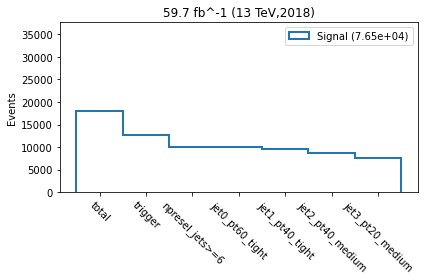

In [15]:
study.cutflow([tree])

# Six Jet Selection

In [4]:
first_remaining = Selection(tree,include=baseline,tag="remaining")
first_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=60,btagcut=jet_btagWP[tightWP]),njets=1,include=baseline,tag="T60")

In [5]:
second_remaining = Selection(tree,previous=first_signaljet,include=baseline,tag="remaining")
second_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=40,btagcut=jet_btagWP[tightWP]),njets=1,previous=first_signaljet,include=baseline,tag="T40")

In [6]:
third_remaining = Selection(tree,previous=second_signaljet,include=baseline,tag="remaining")
third_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=40,btagcut=jet_btagWP[mediumWP]),njets=1,previous=second_signaljet,include=baseline,tag="M40")

In [7]:
fourth_remaining = Selection(tree,previous=third_signaljet,include=baseline,tag="remaining")
fourth_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=20,btagcut=jet_btagWP[mediumWP]),njets=1,previous=third_signaljet,include=baseline,tag="M20")

In [8]:
fifth_remaining = Selection(tree,previous=fourth_signaljet,include=baseline,tag="remaining")
fifth_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=20,btagcut=jet_btagWP[looseWP]),njets=1,previous=fourth_signaljet,include=baseline,tag="L20")

In [9]:
sixth_remaining = Selection(tree,previous=fifth_signaljet,include=baseline,tag="remaining")
sixth_signaljet = Selection(tree,cuts=dict(njetcut=1,ptcut=20,btagcut=jet_btagWP[looseWP]),njets=1,previous=fifth_signaljet,include=baseline,tag="L20")

In [10]:
sixjet_selection = sixth_signaljet.merge(tag="trial")

# Plots

In [11]:
def plot_selection(remaining,signaljet,tag=None):
    saveas_1 = f"{tag}_remaining" if tag else None
    saveas_2 = f"{tag}_signaljet" if tag else None
    
    signal_study.jets_ordered(remaining,njets=1,topbkg=1,saveas=saveas_1)
    signal_study.jets_2d_ordered(remaining,njets=1,topbkg=1,log=1,compare=1,print_score=0,saveas=saveas_1)

    signal_study.jets(signaljet,saveas=saveas_2)
    signal_study.jets_2d(signaljet,log=1,print_score=0,saveas=saveas_2)

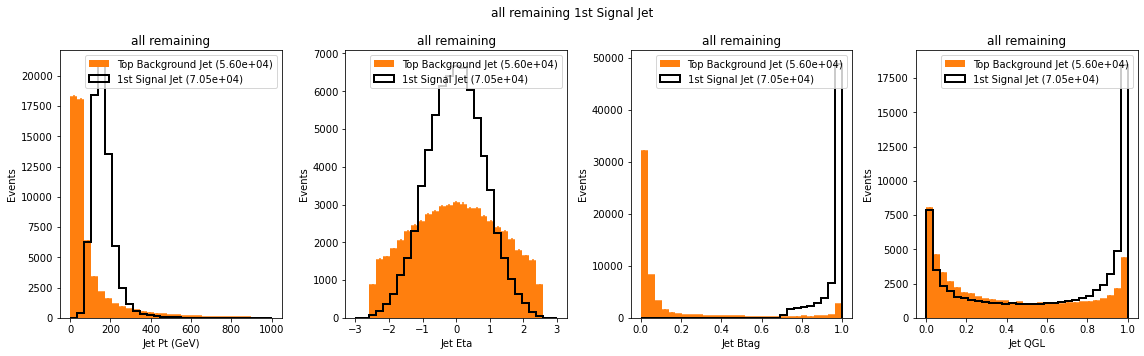

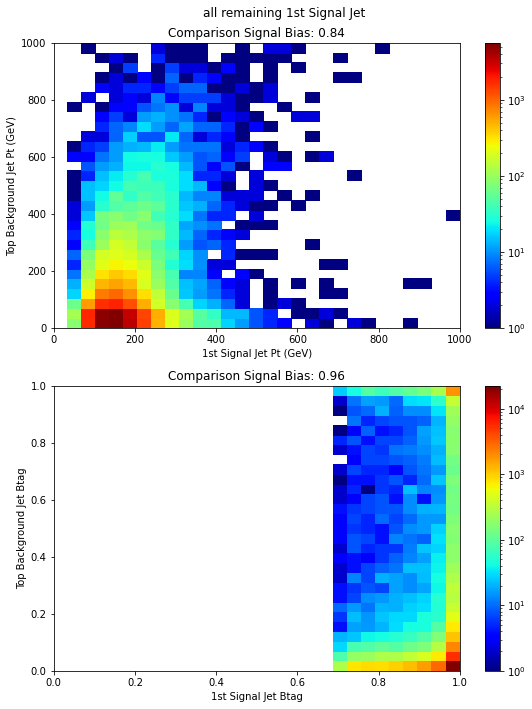

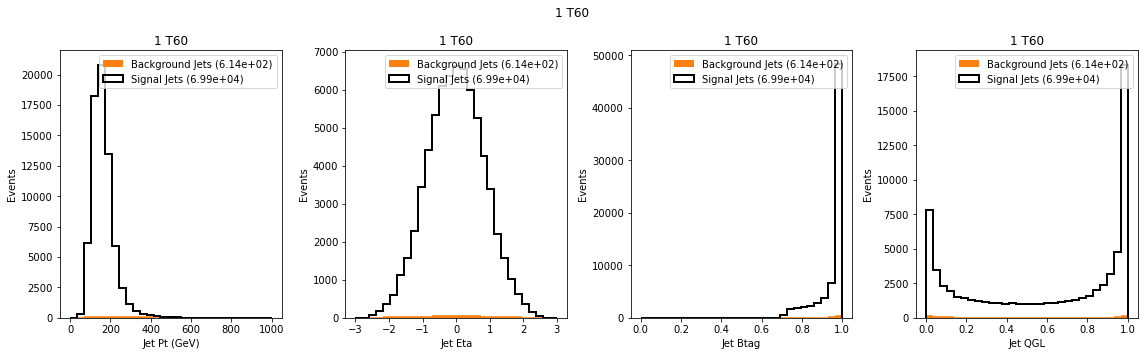

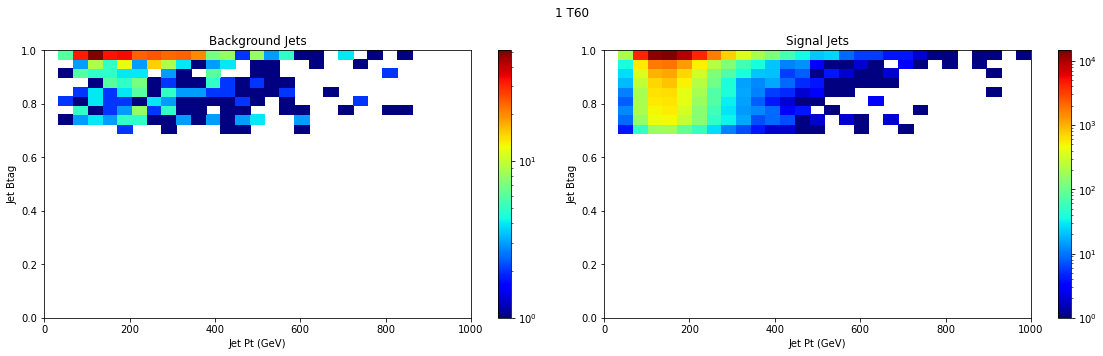

In [12]:
plot_selection(first_remaining,first_signaljet,tag="first")

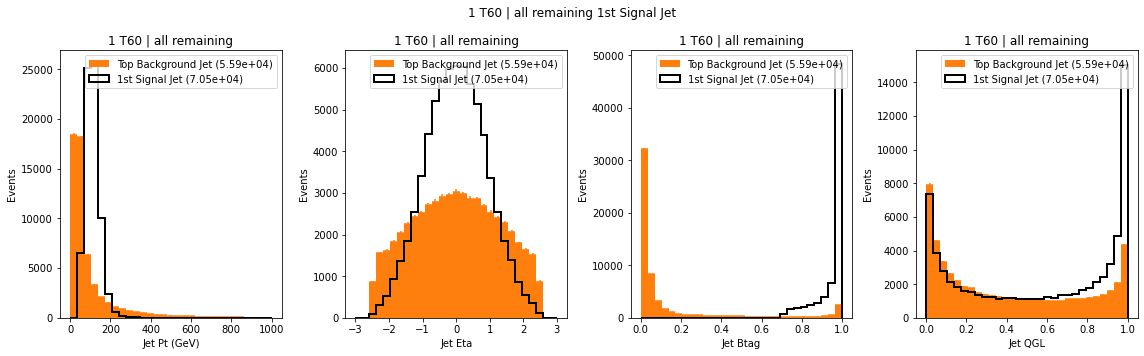

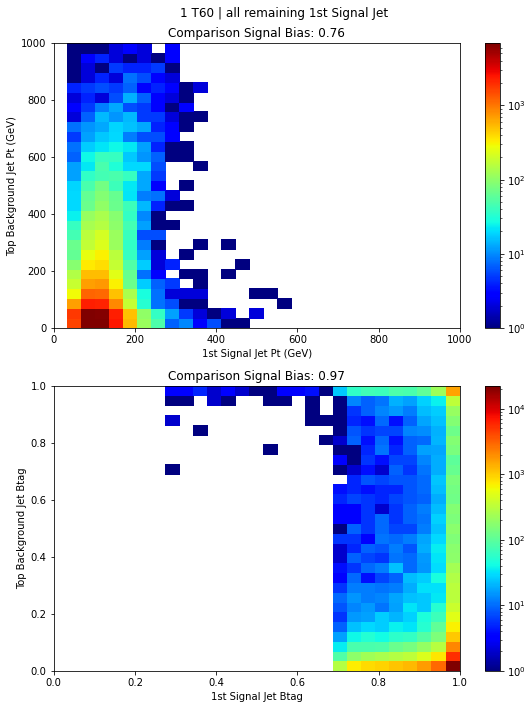

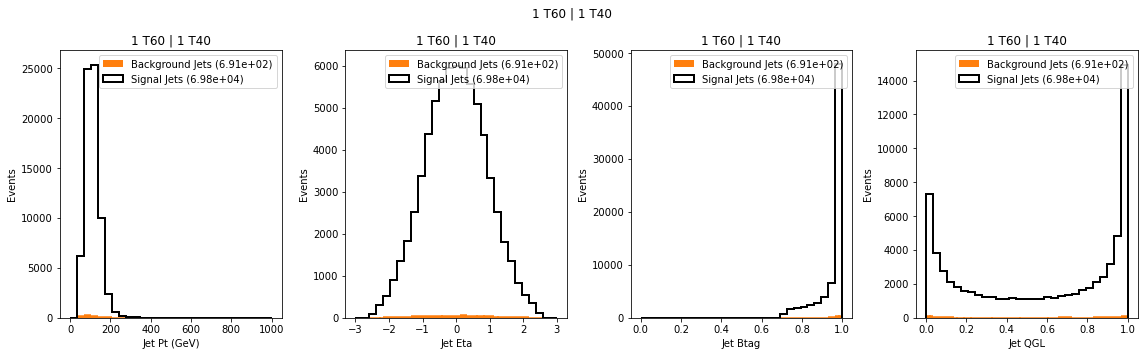

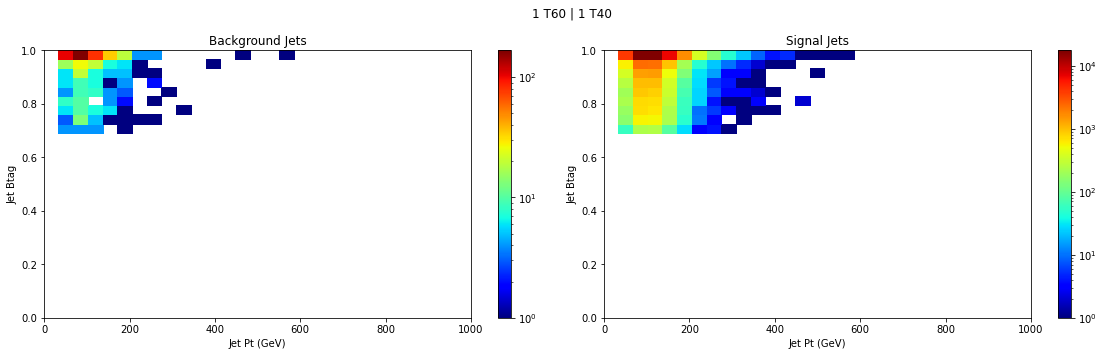

In [13]:
plot_selection(second_remaining,second_signaljet,tag="second")

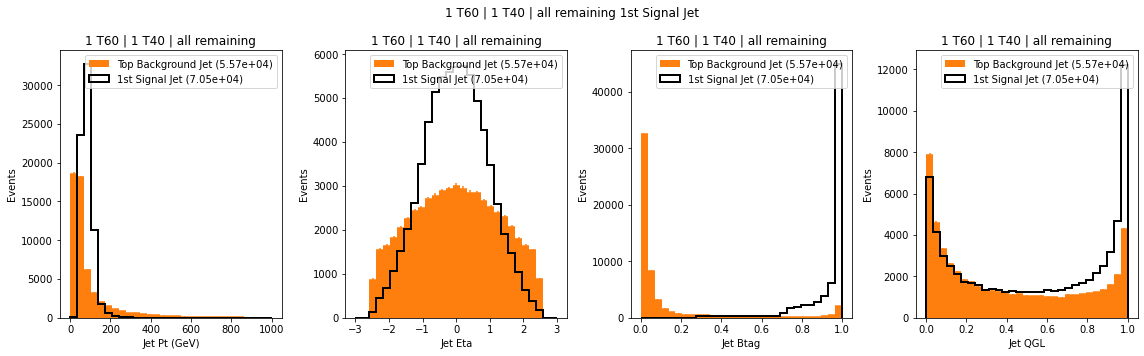

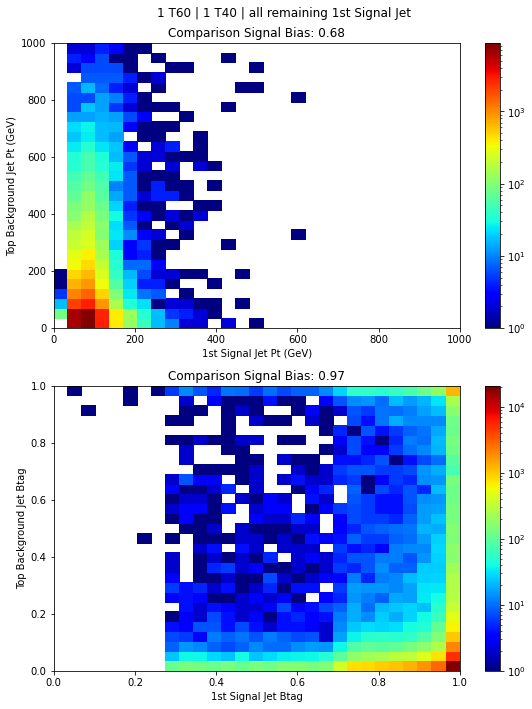

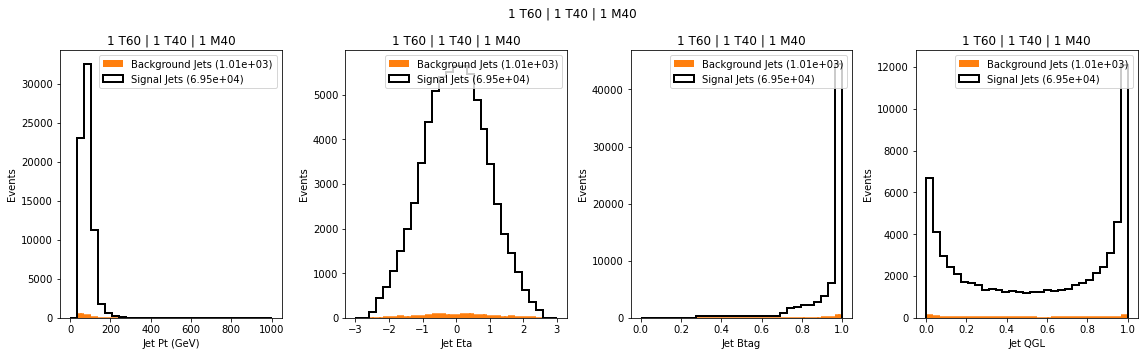

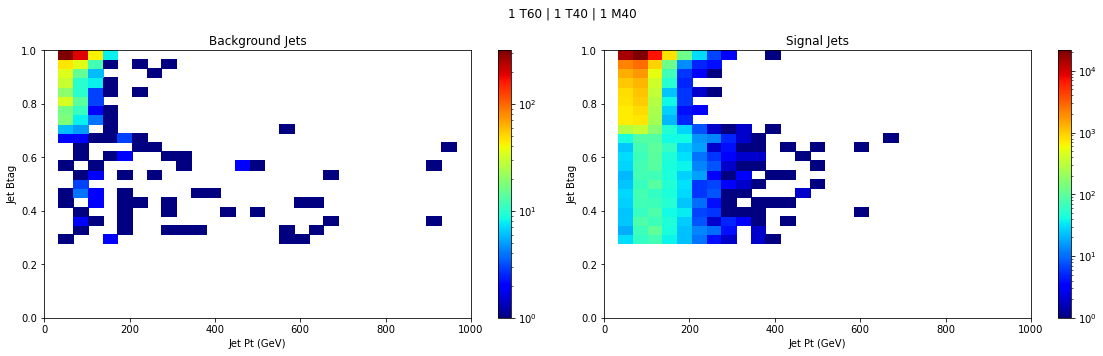

In [14]:
plot_selection(third_remaining,third_signaljet,tag="third")

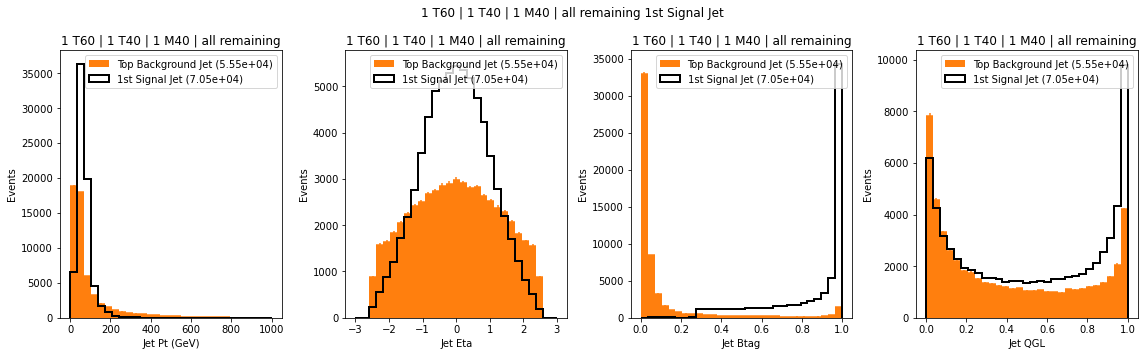

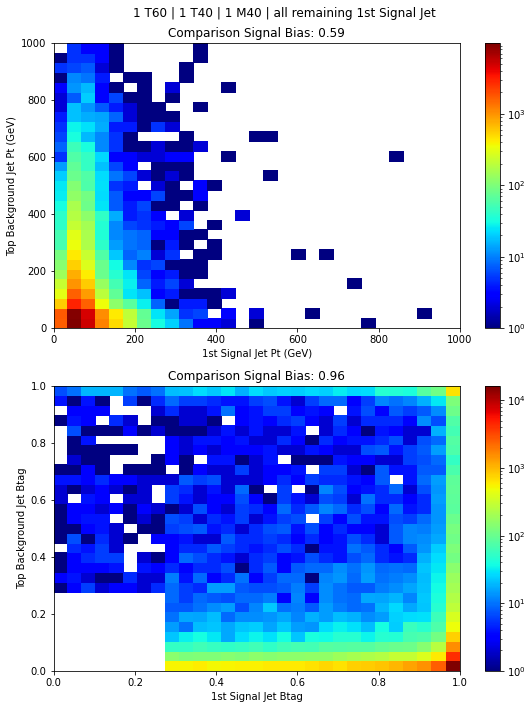

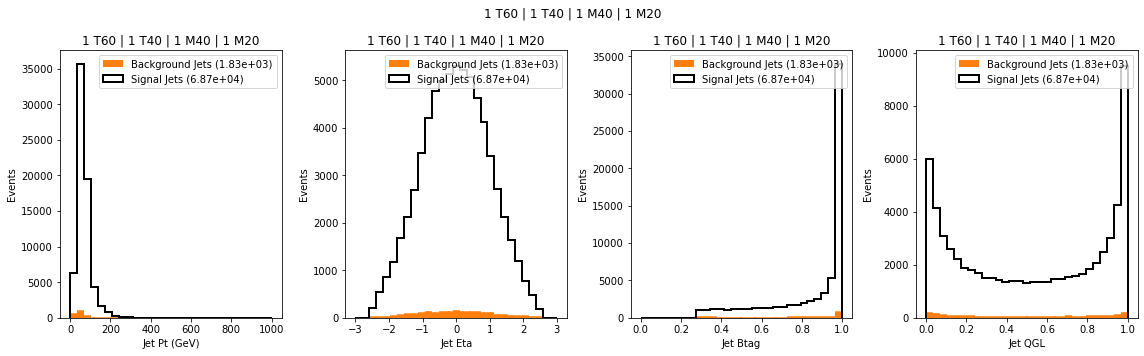

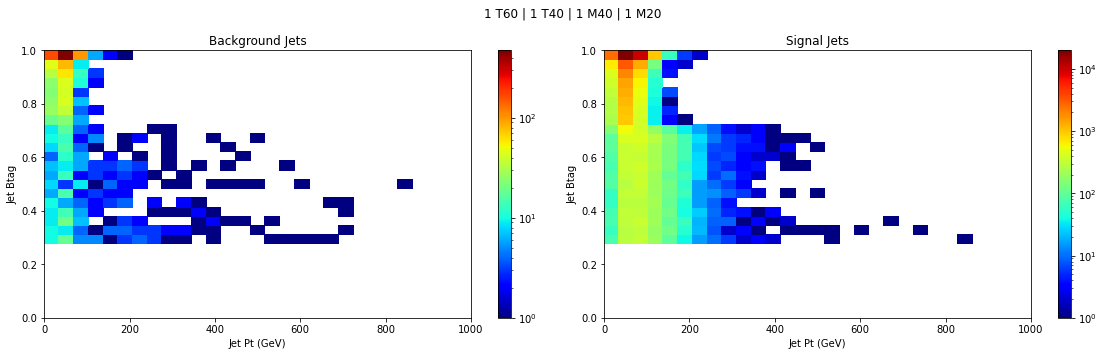

In [15]:
plot_selection(fourth_remaining,fourth_signaljet,tag="fourth")

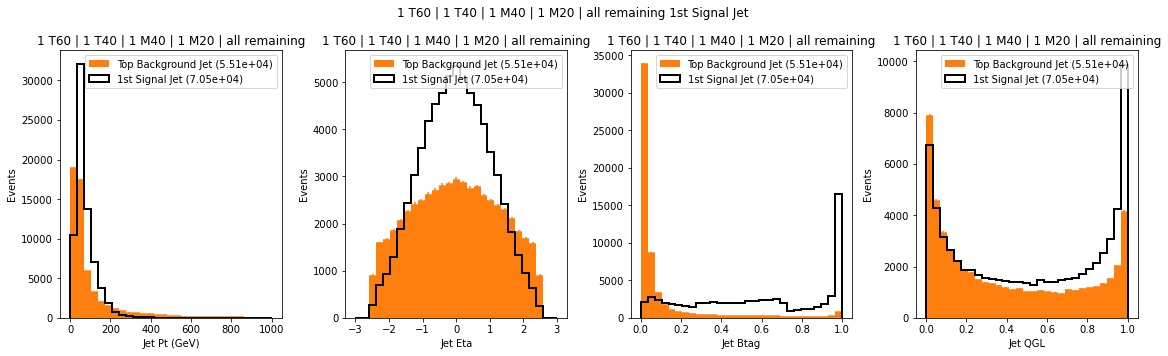

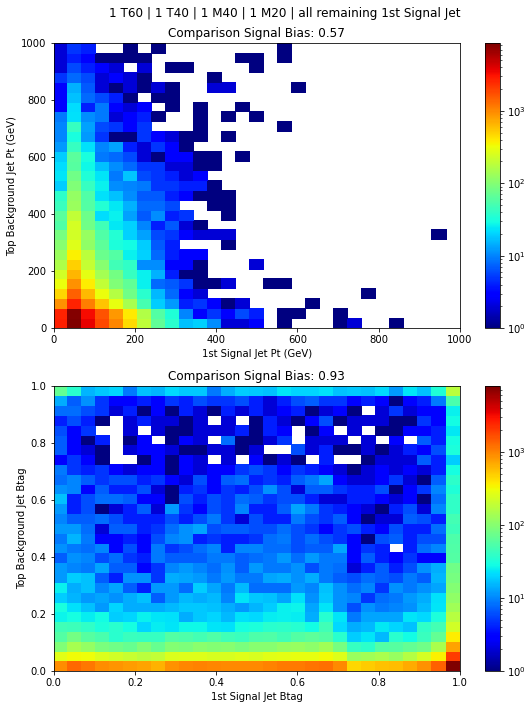

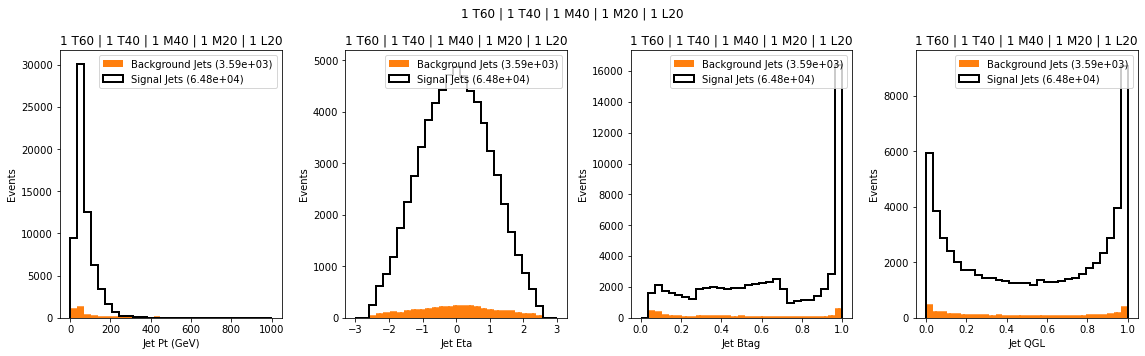

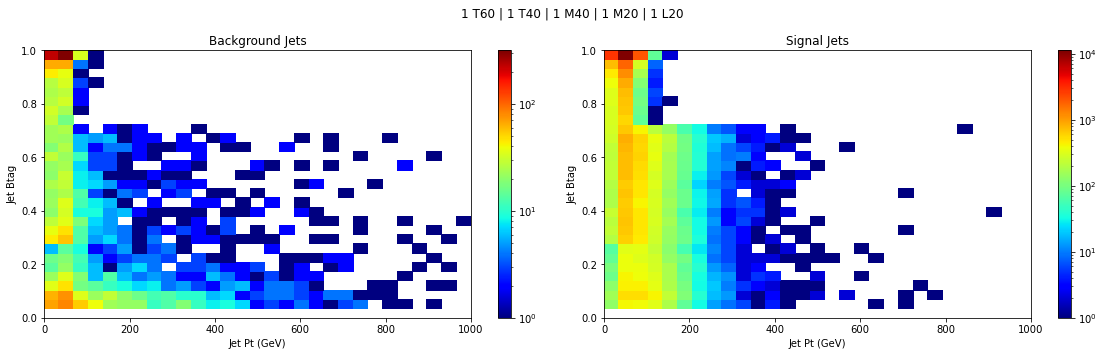

In [16]:
plot_selection(fifth_remaining,fifth_signaljet,tag="fifth")

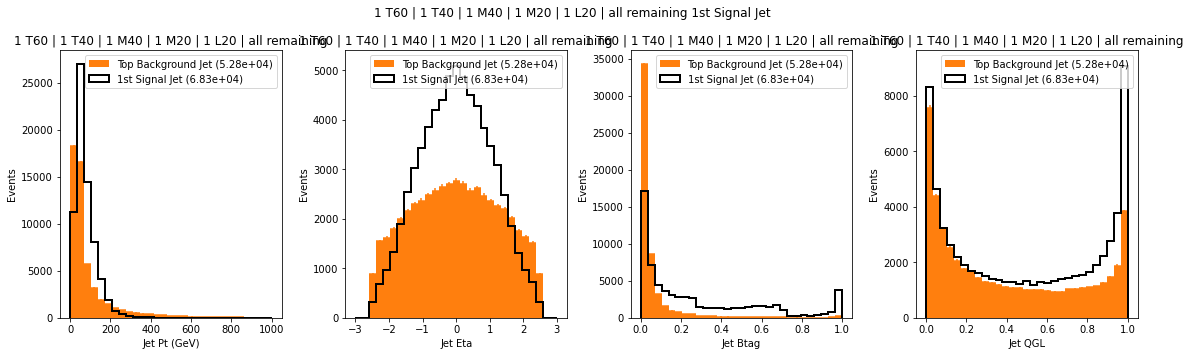

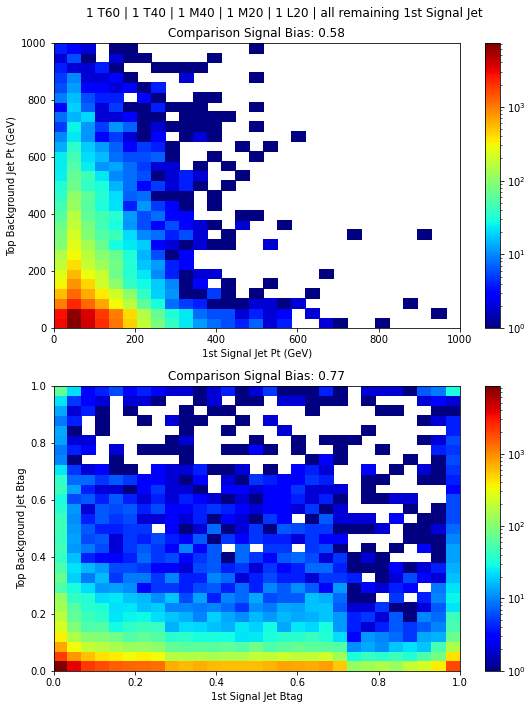

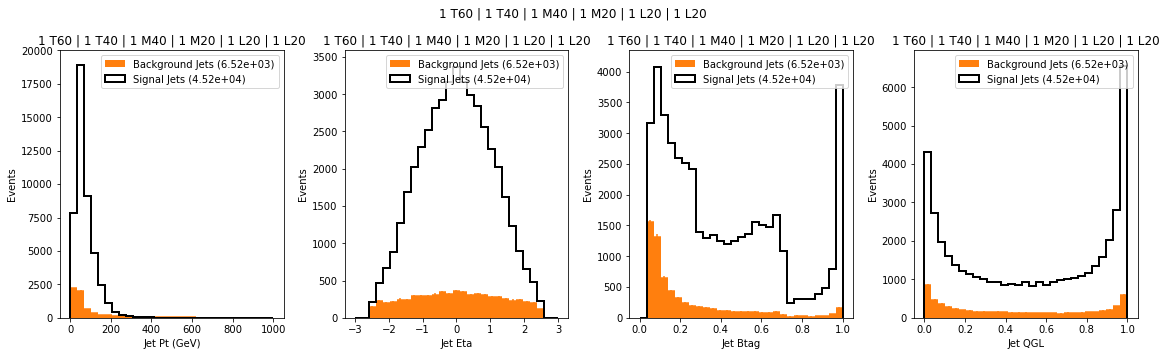

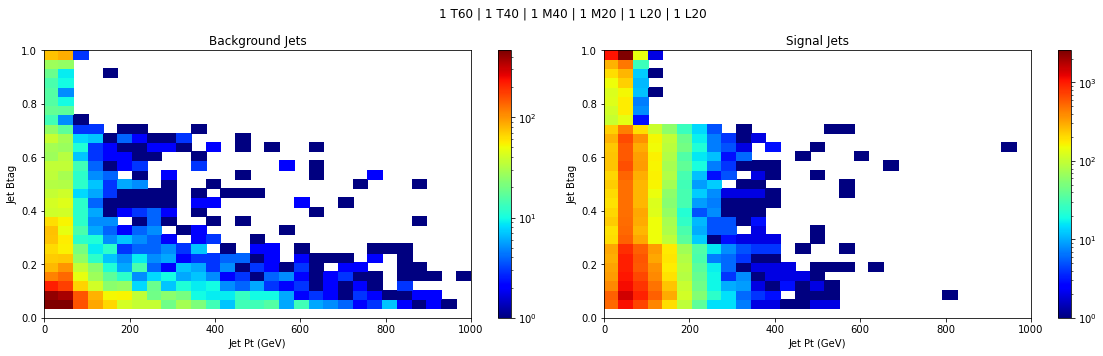

In [17]:
plot_selection(sixth_remaining,sixth_signaljet,tag="sixth")